In [ ]:
#installing the dependencies

! pip install easyocr
! pip install imutils


Error processing line 1 of /home/giz/.local/lib/python3.8/site-packages/vision-1.0.0-nspkg.pth:

  Traceback (most recent call last):
    File "/usr/lib/python3.8/site.py", line 175, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [5]:
#importing the packages 

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os
import csv


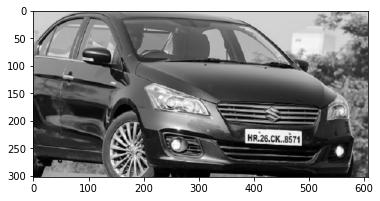

In [97]:
img = cv2.imread('image01.jpeg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

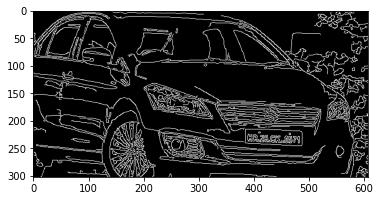

In [98]:
# Noise reduction(all the differeces in brightness and tones) / and edege detection ....

noise_reduction = cv2.bilateralFilter(gray , 11, 17 , 17)

edge_detection = cv2.Canny(noise_reduction , 30 , 200)

plt.imshow(cv2.cvtColor(edge_detection , cv2.COLOR_BGR2RGB))


In [99]:
#Find polygons or rectangles obiviously ... you know number plates ...and then apply mask 

keypoints = cv2.findContours(edge_detection.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rectangles = imutils.grab_contours(keypoints)
rectangles = sorted(rectangles, key=cv2.contourArea, reverse=True)[:10]

In [100]:
# Finding the approximate location of the number plate

number_plate_location = None

for rectangle in rectangles :
    approx = cv2.approxPolyDP(rectangle, 10, True)
    if len(approx) == 4:
        number_plate_location= approx
        break
        

In [101]:
number_plate_location

array([[[385, 215]],

       [[385, 240]],

       [[488, 243]],

       [[484, 218]]], dtype=int32)

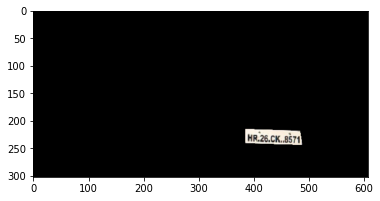

In [102]:
#Highlighting the numberplate.... (MASKING...)

mask = np.zeros(gray.shape,np.uint8)
image = cv2.drawContours(mask,[number_plate_location ],0,255,-1)
image = cv2.bitwise_and(img,img, mask = mask)


plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

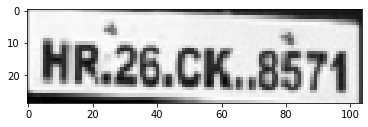

In [103]:
# Croping the image
(x,y) = np.where (mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
croped = gray[x1:x2+1 , y1:y2+1]
plt.imshow(cv2.cvtColor(croped, cv2.COLOR_BGR2RGB))


In [104]:
#Reading the text...

see = easyocr.Reader(['en'])
result = see.readtext(croped)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 4], [104, 4], [104, 29], [0, 29]], 'HR.26.CK,8571', 0.6360416987724248)]

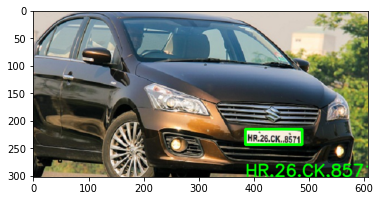

In [105]:
# FInal result 

text = result [0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text = text , org =(approx[0][0][0] , approx[1][0][1] +60),fontFace =font, fontScale = 1, 
                  color = (0,255,0) ,thickness = 2 , lineType = cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))





In [88]:
# Then finally you can do as you wish ... like you can save this data in csv file.
# By using this small module you can build something bigger.